En los últimos 6 meses el indicador de efectividad (e = (Venta/Base)*100%) ha decrementado en -4pp, yendo de 12% a 8% de efectividad lo que no está permitiendo a los ejecutivos comerciales poder cobrar sus bonos variables ¿Cómo puede la institución financiera tener una mayor efectividad para futuras campañas de marketing? Para responder a esto, tenemos que analizar la última campaña de marketing que realizó el banco e identificar los patrones que nos ayudarán a encontrar conclusiones para desarrollar estrategias futuras y mejorar el KPI de efectividad.

Problema: Se requiere que los ayude a identificar a los clientes con alta probabilidad de ACEPTAR LA CAMPAÑA DE MARKETING.

Objetivos: Realizar análisis exploratorio de datos para identificar características predominantes de los clientes contactados, garantizar la calidad de los datos mediante transformación de datos nulos y la identificación de valores atípicos, determinar medidas de tendencia central para comprender el comportamiento y variabilidad de los indicadores, visualizar patrones, desarrollar representaciones gráficas que permitan contrastar el éxito de la campaña frente a variables clave y generar recomendaciones estratégicas basadas en hallazgos cuantitativos. 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

In [4]:
df = pd.read_csv('C:/Users/Momotaro/Downloads/BankMarketing.csv', sep = ';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Analizamos que el dataset se haya cargado apropiadamente, revisando las columnas y los valores faltantes.

In [5]:
print(f"Dimensión: ", df.shape)
print(f"Columnas: ", df.columns)
print("Tipo de datos")
df.info()

Dimensión:  (41188, 21)
Columnas:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-nul

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Edad = El 50% de los clientes tienen entre 38 y 47 años, siendo un público adulto joven a adulto medio.Esto permite identificar que gran número de la campaña puede centrarse en este rango de edades. 

Duración = Por lo visto en los datos, vemos que el 50% de la duración de las llamadas suelen durar más de 180 segundos, aproximadamente 3 minuto a 5 minutos, pero hay existencias de 56 minutos. 

Esto es un buen indicador para proponer las campañas detallando llamadas largas con el fin de aceptar los productos ofrecidos. 

Campaña = El 50% de los clientes al menos fueron contactados 2 veces en el año para ofrecer la campaña de marketing. En ese mismo sentido, observamos que existe casos máximos de 56 veces intentos, esto puede ser perjuicioso porque puede generar rechazo. 

Pdías = Observamos que la gran mayoría de contactos no habían sido contactado anteriormente (75%), demostrando que la campaña tiene más posibilidades de que funcionen. Eso mismo puede mostrar un riesgo, ya que el primer contacto puede determinar si el cliente adquiera el producto ofrecido. 

Previo = Esto confirma que la gran mayoría de contactos no han sido contactados previamente para ofrecer algun producto. Sin embargo, existe un grupo pequeño de 7 contactos previos, si se quiere llegar a este grupo minotario, se debe de replantear la estrategia comercial, ya que puede ser considerado un "cliente dificil". 

emp.var.rate = Observamos que la mediana tiene como valor 1.1, esto indica que la mayor parte de la campaña se realizó en un periodo de crecimiento de empleo. Esto es algo positivo, ya que un mercado laboral estable facilita que los clientes se sientan seguros para adquirir compromisos financieros.

cons.price.idx = Según los datos, el índice se mantiene estable. Esto demuestra que no hubo una inflación descontrolada durante la gestión.

cons.conf.idx = Observamos que todos los valores son negativos, teniendo vemos que el 50% tiene un valor de -41.8. Esto indica que existe un sentimiento de desconfianza en el público, significando tener llamadas más largas para convencer al cliente, debido a su inseguridad sobre el futuro económico.

euribor3m = Vemos que el 50% de los contactos se dieron con una tasa superior al 4.85%. Al ser una tasa de interés alta, el escenario es muy favorable para ofrecer productos de ahorro o depósitos, pero representa un obstáculo si el objetivo de la campaña fuera colocar créditos o préstamos.

nr.employed = Observamos que el número de empleados se mantiene cerca de su máximo (5228). Esto confirma que la campaña se dirige a un público con alta tasa de ocupación, lo que asegura que los contactos tienen ingresos estables, reduciendo el riesgo de incumplimiento en los productos ofrecidos.

In [7]:
# Valores perdidos 
miss = df.isna().sum()
miss_tbl = miss[miss>0].sort_values(ascending=False)
display(miss_tbl)

# Imputación de nulos 
num_cols = df.select_dtypes(include={np.number}).columns 
cat_cols = df.select_dtypes(exclude={np.number}).columns

def moda_serie(s):
    vals = s.dropna().astype(str)
    return Counter(vals).most_common(1)[0][0] if not vals.empty else None 

for c in num_cols: 
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

for c in cat_cols: 
    if df[c].isna().any(): 
        m = moda_serie(df[c])
        if m is not None: 
            df[c] = df[c].fillna(m)



Series([], dtype: int64)

Interpretación: 

El data set no muestra pérdida de datos, esto significa que existe buena calidad de datos. Pese a esto, se crea una función para la completar los datos faltantes mediante la mediana a las variables numéricas y con la moda a variables categóricas 

In [8]:
df.replace("unknown", np.nan, inplace=True)

Reemplazamos los valores que no tengan un valor con "Nan" para el tratamiento de datos a futuro.

In [9]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df['education'] = df.education.str.replace('.', ' ')

Limpiamos los datos de la columna educación, elimintando el punto para agregar un espacio para que sea más legible, con el fin de al momento de usar esta columna en los gráficos se aprecie mejor

In [11]:
df.head(200)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic 9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

Cambiamos los datos "No" y "Sí" por datos númericos (1, 0) con el fin de poder utilizarlos para el análisis

In [13]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic 9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
variables = ['age', 'duration', 'campaign', 'euribor3m'] 
estadistico_df = df[variables].agg(['mean', 'median', 'std','var']).T
estadistico_df['Coeficiente_Variedad']= (estadistico_df['std'] / estadistico_df['mean'])*100

print(f"Análisis estadístico completo", estadistico_df)
display(estadistico_df)

Análisis estadístico completo                  mean   median         std           var  Coeficiente_Variedad
age         40.024060   38.000   10.421250    108.602451             26.037463
duration   258.285010  180.000  259.279249  67225.728877            100.384939
campaign     2.567593    2.000    2.770014      7.672975            107.883690
euribor3m    3.621291    4.857    1.734447      3.008308             47.895833


,mean,median,std,var,Coeficiente_Variedad
age,40.024060,38.000,10.421250,108.602451,26.037463
duration,258.285010,180.000,259.279249,67225.728877,100.384939
campaign,2.567593,2.000,2.770014,7.672975,107.883690
euribor3m,3.621291,4.857,1.734447,3.008308,47.895833


In [15]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df['duration']> limite_superior) | (df['duration']< limite_inferior) ]

print(f"Límite superior para duración: {limite_superior} segundos")
print(f"Cantidad de valores atípicos detectados: {len(outliers)}")

Límite superior para duración: 644.5 segundos
Cantidad de valores atípicos detectados: 2963


Text(0, 0.5, 'Cantidad de clientes')

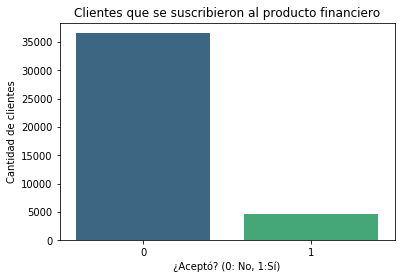

In [16]:
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Clientes que se suscribieron al producto financiero')
plt.xlabel('¿Aceptó? (0: No, 1:Sí)')
plt.ylabel('Cantidad de clientes')



Esto nos da una oportunidad de observar que tenemos que existe un aproximado de 3500 clientes que no se llegaron a suscribir al producto en comparación a los que sí lo llegaron a realizar siendo un aproximado de 5000, con el objetivo de aumentar las suscripciones se puede realizar un modelo de machine learing donde pueda agrupar a los clientes con características similares con los suscriptores iguales, de esta forma realizan una propuesta más específica y personalizada reduciendo costos por adquisión de clientes. 


Text(0, 0.5, 'Duración')

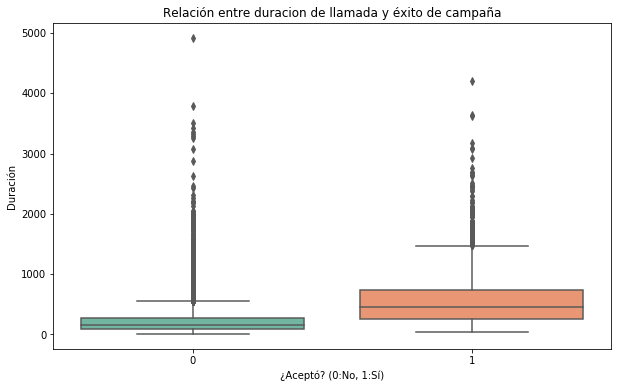

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y', y='duration', data=df, palette='Set2')
plt.title('Relación entre duracion de llamada y éxito de campaña')
plt.xlabel('¿Aceptó? (0:No, 1:Sí)')
plt.ylabel('Duración')

Mediante este gráfico podemos observar que existe una correlación entre la llamada y la aceptación del producto. Así mismo, demuestra que las llamadas por lo general se vuelven extensas tanto para los clientes que aceptan y rechazan la propuesta. Pese a esto es importante tomar en cuenta, la media de las duración de las llamadas que fueron rechazadas son cortas, indicando que por lo general no escuchan por completo la propuesta. Se propone establecer un plan de optimización a la información que se brinda, resaltándo los beneficios de la suscripción. 

Text(0, 0.5, 'Educación')

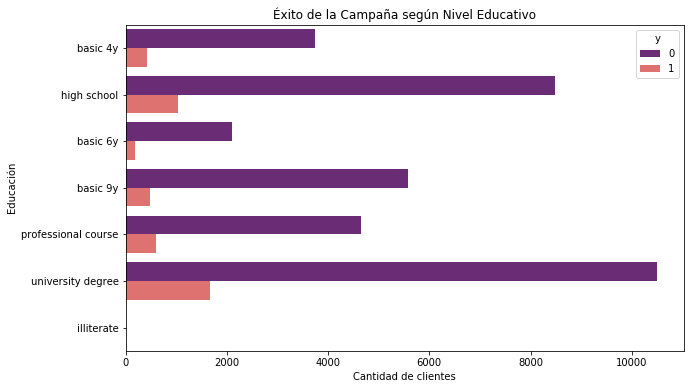

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='education', hue='y', data=df, palette='magma')
plt.title('Éxito de la Campaña según Nivel Educativo')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Educación')

Podemos entender gracias al gráfico que al grupo de personas que se les ha ofrecido el producto tienen como estudio universitario superando el valor de 10,000 contactos totales, seguido de las personas que están en educación secundaria que supera los 8,000. En ese mismo sentido se puede resaltar que cantidad de rechazo es alto siendo la taza de rechazo un 86%. Una buena estrategía sería centrarnos en par de grupo de personas y tratar de mencionar el posible beneficio que tendría la suscripción en beneficio a su educación previniente. Esta acción puede convencer al cliente de tomar la suscripción 

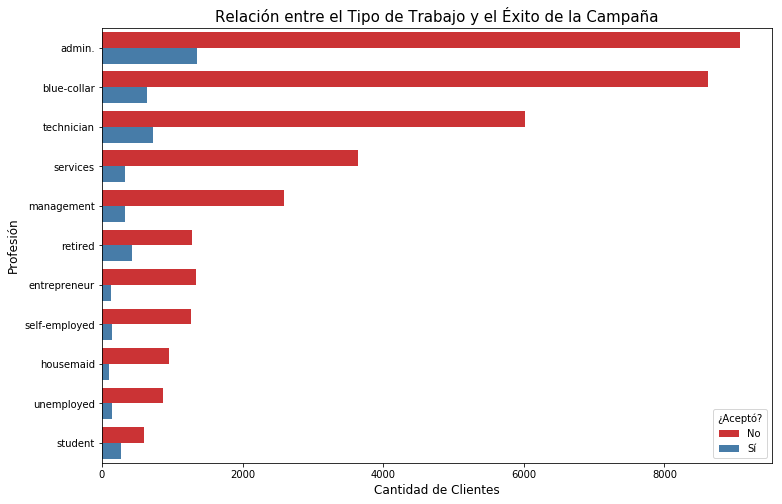

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='job', hue='y', palette='Set1', order=df['job'].value_counts().index)
plt.title('Relación entre el Tipo de Trabajo y el Éxito de la Campaña', fontsize=15)
plt.xlabel('Cantidad de Clientes', fontsize=12)
plt.ylabel('Profesión', fontsize=12)
plt.legend(title='¿Aceptó?', labels=['No', 'Sí'])


Observamos que los profesionales que están dentro del tipo de trabajo de administración superando los 9,000 contactos (contando tanto los que rechazaron como los que aceptaron la suscripción), seguido de los empleados de cuello azul estando cerca de los 8,000 contactos también. Junto con el anterior gráfico, nos permite entender de una forma más específica las características de los clientes. Según el gráfico vemos un gran número de rechazo en la suscripción. En esta sección podemos personalizarlo aún más en el beneficio que pueden adquirir la suscripción en beneficio a su profesión, o inclusive, en relación con los ingresos promedio que puedan tener. 

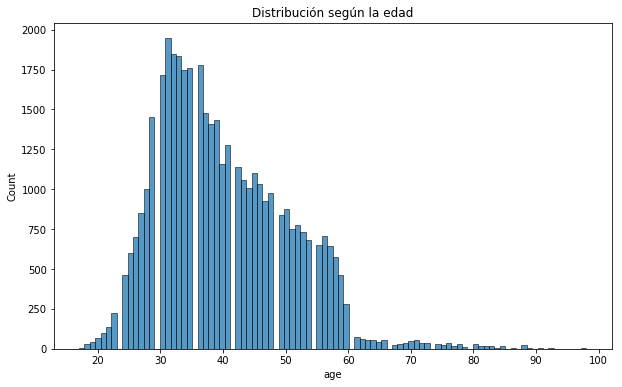

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age')
plt.title('Distribución según la edad')
plt.show()

Podemos observar que cerca del 70% de los clientes tienen un rango de edad entre 30-40 años, esto puede ser un buen indicador (junto con las profesiones y estudios de los clientes) para poder determinar un aproximado de los ingresos. Vemos que cerca de 2,000 contactos rondan entre los 32-34 años. Esto nos permite tener segmentado mejor los contactos para el modelo de machine learning que se propuso anteriormente. Cabe resaltar que existe un grupo de contactos de 60 años a más que pueden tener un comportamiento diferente en el aspecto del gasto. 

Conclusiones generales: 

1. La limpieza de datos ayuda a determinar que cerca del 20% de la información tenía la etiqueta de "Unknown"
2. El análisis estadístico reveló una alta variabilidad en la duración de las llamadas, esto indica que se debe mejorar la estandarización en el procesos de ventas. 
3. Se identificó que los perfiles universitarios y administrativos son nuestro público objetivo, pese a que tengan una baja taza de aceptación. 
4. Las variables macroeconómicas muestran un entorno de desconfianza que dificulta la venta de productos de riesgo. 
5. El uso de herramientas de visualización permitió confirmar que llamadas más largas están correlacionadas con una mayor probabilidad de éxito.